# Assignment 7
Akhmedova Shakhnoza

Stay excited, Dear Professor :)

# **PART 1 :)**

# SECTION 1 :)
Name of the dataset: Gender classification images

# Image datasets has been classified genderwise as "females" and "males".
The image datasets can be found in the following location of laptop : "C:\Users\nakhm\OneDrive\Desktop\NozaFinalProject". The image datasets have also been uploaded and represented as a file into the github repo named as "akhmedova_week10".

# SECTION 2 :)

Explain your data set, how it is composed, and how you collected it.

# There are two gender recognition datasets called "females" and "males".

# Gender classification DATASET:
The gender classification dataset comrises of .jpg images that have been downloaded from Google on following websites such as Google facial expression comparison and kaggle:

1. https://www.kaggle.com/cashutosh/gender-classification-dataset

2. https://research.google/tools/datasets/google-facial-expression/

I have downloaded gender recognition images from those images, combined 1,000 female faces and 1,000 male faces to work and train with.



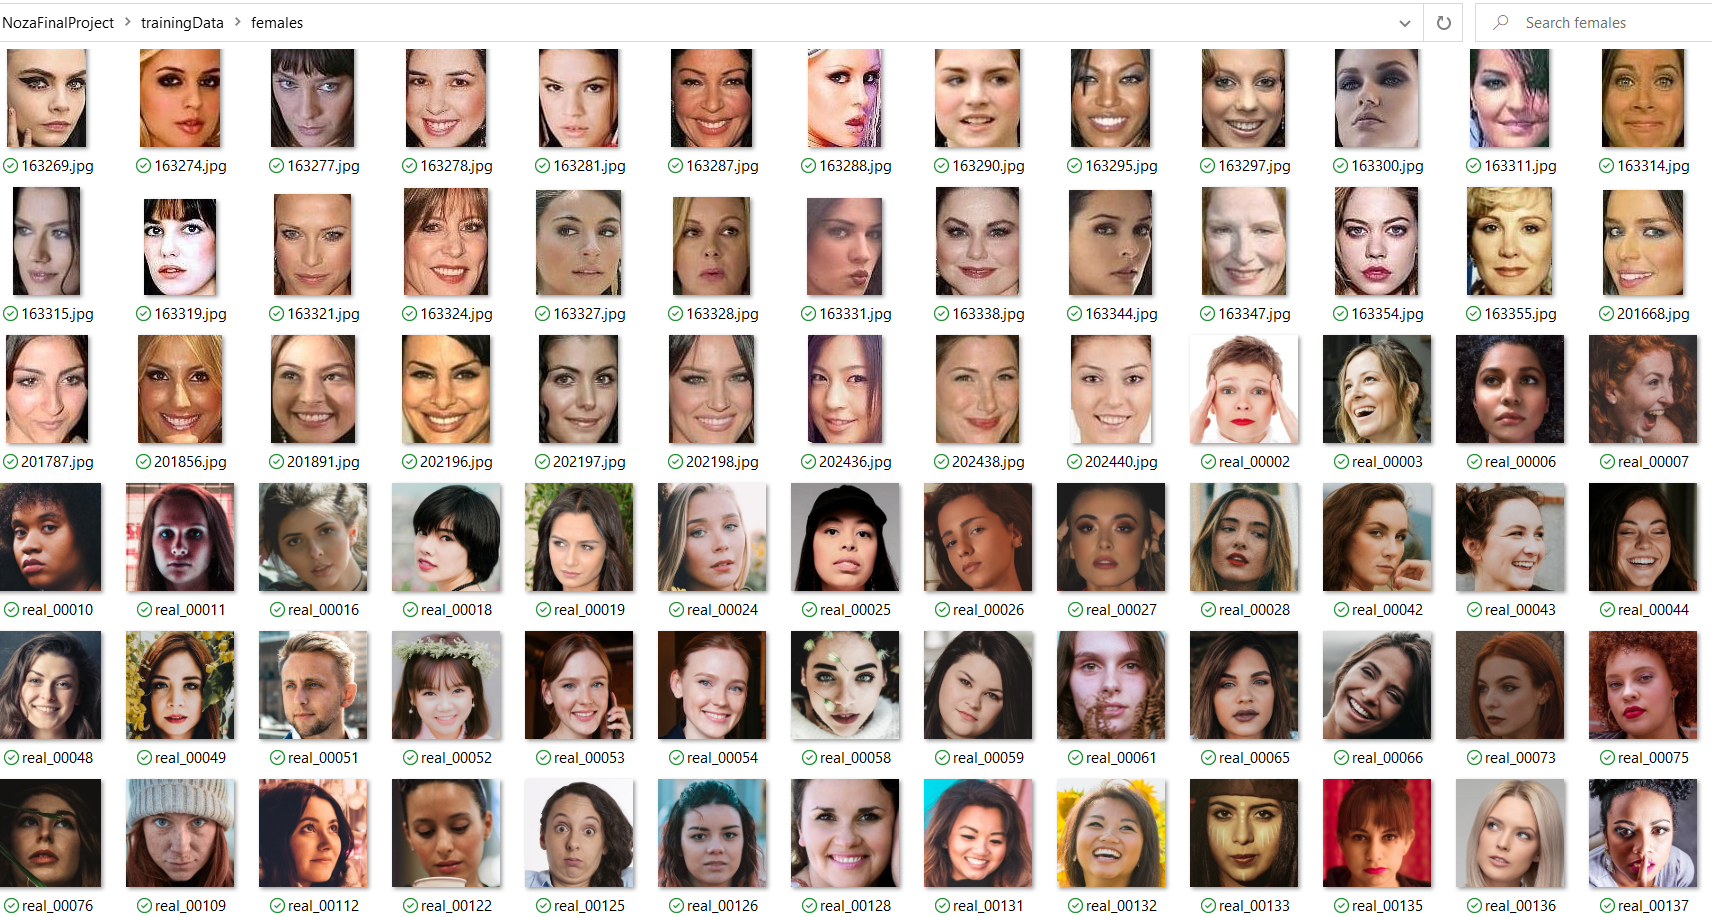

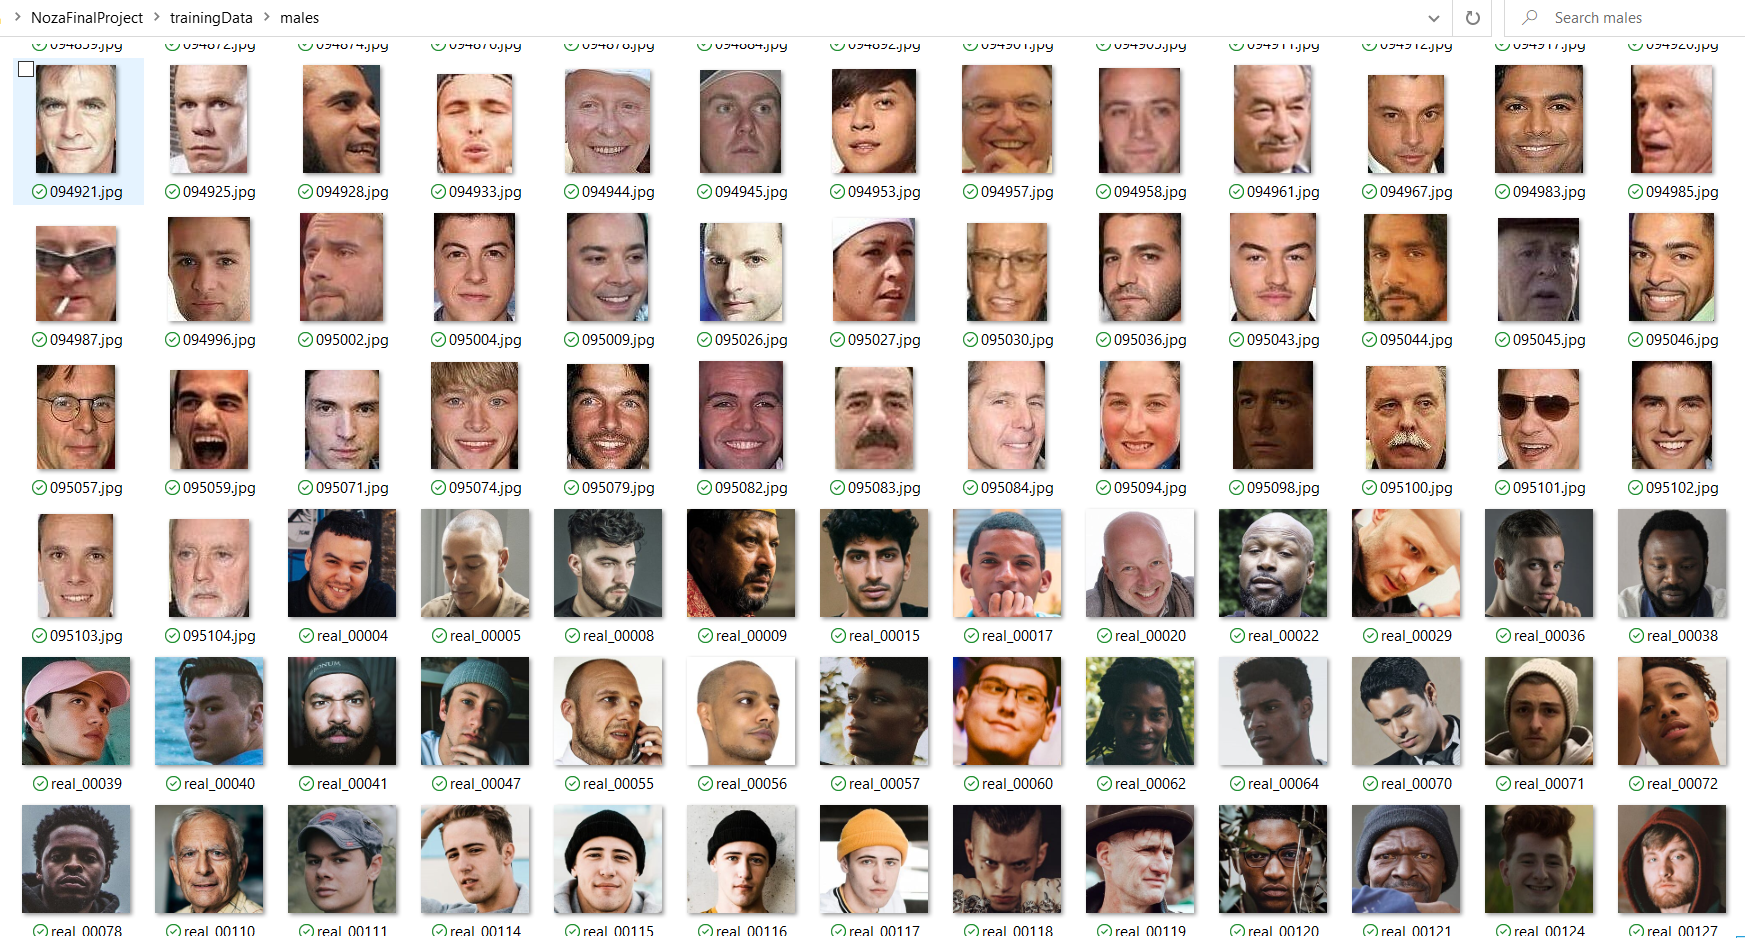

# SECTION 3  :)
Loading your own dataset.

In [523]:
import tensorflow as tf #importing the libraries which are essential
from tensorflow import keras
from tensorflow.keras import layers

I use google colab for my work. First of all, I uploaded my folder as a zip file and unziped it using below.

In [ ]:
!unzip -q noza_train_data.zip


In [525]:
DataDir = 'trainingData'

In [526]:
Categories = ['females','males'] #the two image datasets

Displaying the image of celebrity from female facial picture originating from female dataset

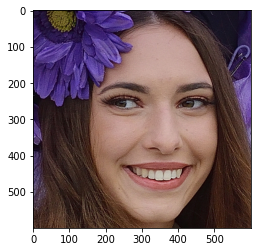

In [527]:
import os
import matplotlib.pyplot as plt

female_img = plt.imread("/content/trainingData/females/real_01027.jpg")
plt.imshow(female_img)


Displaying actor from male facial image dataset 

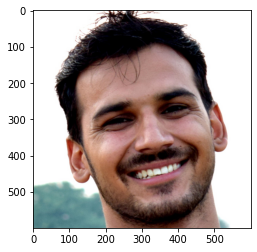

In [528]:
import os
import matplotlib.pyplot as plt

male_img = plt.imread("/content/trainingData/males/real_00394.jpg")
plt.imshow(male_img)


In [529]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [530]:
#function to create training dataset
ImageWidth = 80
ImageHeight = 100
def createTrainingData():
    trainingData = []
    for category in Categories:
        path = os.path.join(DataDir,category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(ImageWidth,ImageHeight))
                trainingData.append([new_array,category])
            except:
                pass
    return trainingData

In [531]:
ImageDataset = createTrainingData() #creating dataset

100%|██████████| 1000/1000 [00:03<00:00, 324.46it/s]


Saving my ImageDataset as pickle file:

In [532]:
import pickle
pickleOut = open('noza_train_data.pickle','wb')
pickle.dump(ImageDataset,pickleOut)
pickleOut.close()

Loading my dataset:

In [533]:
pickleIn = open('noza_train_data.pickle','rb')
dataset = pickle.load(pickleIn)

In [534]:
dataset[0] #first instance of my data

[array([[109, 120, 130, ...,  14,  16,  20],
        [115, 126, 130, ...,  13,  14,  14],
        [118, 126, 131, ...,  10,  12,  14],
        ...,
        [ 28,  26,  26, ...,  28,  36,  26],
        [ 30,  27,  27, ...,  37,  27,  25],
        [ 33,  31,  31, ...,  32,  34,  47]], dtype=uint8), 'females']

# **SECTION 4) Show me your data!!!!!!!**

In [ ]:
len(dataset) #total number of data

2000

In [535]:
#counting total number of data in each class
dict_ = {'females':0,'males':0}
for number in dataset:
  dict_[number[1]]+=1

In [536]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt


In [ ]:
Count = pd.DataFrame(dict_,index=['Total Gender Records'])
Count

females  males
Total Gender Records     1000   1000

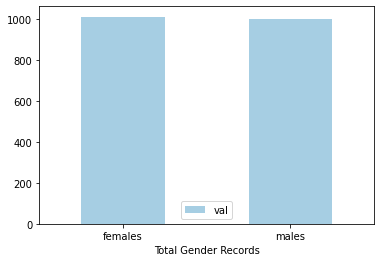

In [ ]:
Count = pd.DataFrame({'Total Gender Records':['females', 'males'], 'val':[1010, 1000]})
ax = Count.plot.bar(x='Total Gender Records', y='val', colormap='Paired', rot=0)

In [537]:
import random
random.shuffle(dataset) #shuffling the data

Plotting 9 images with its label:

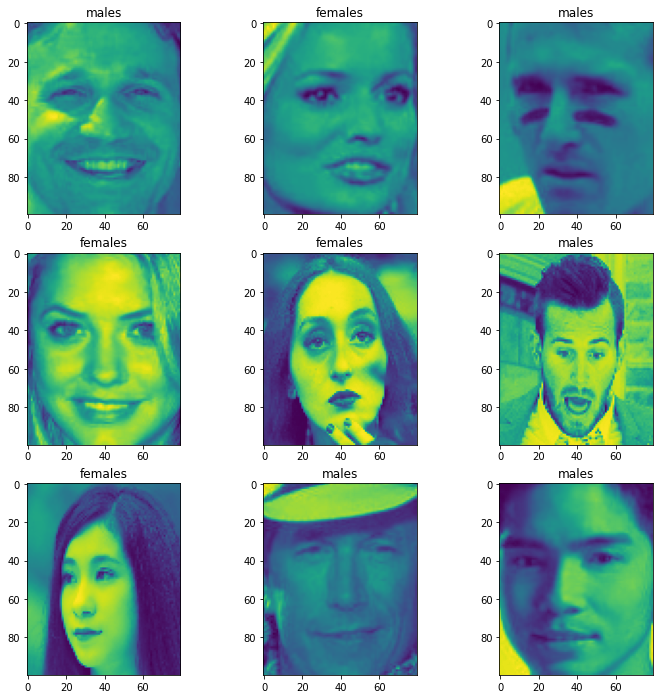

In [538]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
column = 3
row = 3
for item in range(1,row*column + 1):
  plt.subplot(row,column,item)
  plt.imshow(dataset[item][0])
  plt.title(dataset[item][1])
plt.show()



In [ ]:
first_img = ImageDataset[0][0]
print(f'Shape of image: {first_img.shape}')


Shape of image: (100, 80)


In [ ]:
print(f'Datatype of image: {first_img.dtype}')


Datatype of image: uint8


In [ ]:
print(f'Image type: {type(first_img)}')

Image type: <class 'numpy.ndarray'>


# **PART 2 :)**

# SECTION 1 Summary of your project :)

Paragraph 1 - Synthesis of your project:

As a muslim girl, It is of great importance to have my hearscarf on in the presence of men or male guests outside of the family. I don't have to put my headscarf on in the presence of females or female person knocking on the door. Thus, I really wanted to know whether the guests or random people knocking on our door would be female or male so that I would either put my headscarf on or not. This prompted me to work with gender image classification from the scratch.

Paragraph 2 - What kind of ML architecture did you chose to use. Short described what you did about your data set.

I chose a supervised ML model using combimed image datasets from websites such as a kaggle and google research to generate a single dataset to be able to do image classification from the very scratch. I collected the dataset for 2 days, filtered and organized to be 1000 per female and male images because I have selected the gender ages to be between 25-60 years old, respectively, and did some feature engineering to combined gender image dataset. 

Paragraph 3 - What is your own defined success criteria.

I should be able to know the gender of the guests knocking on the door and put my headscarf on in the case of neccessity with the help of image classification algorithm to determine the gender.

# Section 2) Show the code and architecutre of your ML

# Create a dataset



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
!unzip -q noza_train_data.zip

replace trainingData/females/161626.jpg.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
DataDir = 'trainingData'

In [ ]:
Categories = ['females','males'] #the two image datasets

Defining some parameters for the loader:

In [539]:
image_size = (100,80)
batch_size = 32

It's good practice to use a validation split when developing the objected model. To be more precise, 80% of the images are used for training, and 20% for validation.

Splitting image dataset into training and test sets:

In [540]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.20,
    subset="training",
    seed=2000,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


In [541]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DataDir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2000 files belonging to 2 classes.
Using 400 files for validation.


You can find the class names in the class_names attribute on these datasets. These correspond to the directory names in alphabetical order.

In [542]:
class_names = train_ds.class_names
print(class_names)

['females', 'males']


In [543]:
from keras.utils import to_categorical

y_train = to_categorical(y_train_cls,3)
y_test = to_categorical(y_test_cls,3)

In [544]:
y_train.shape

(1600, 3)

# Visualize the data
Here are the first 9 images from the training dataset.


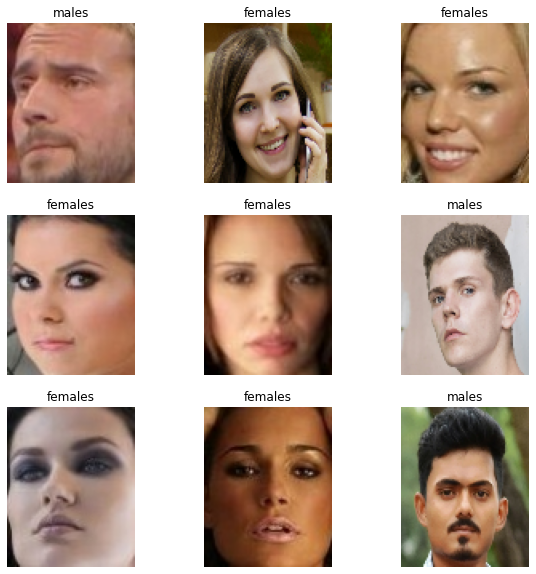

In [545]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)


Image shape:  (32, 100, 80, 3)


In [ ]:
print("Label: ", label.numpy())

Label:  [1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0]


# Section 3) Show the output of your model training with your harvested data set 
Building a Convolutional Neural Networking architecture.

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

.numpy() on the image_batch and labels_batch tensors has been called to convert them to a numpy.ndarray.

In [546]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 80, 3)
(32,)


# Create the model
The model consists of three convolution blocks with a max pool layer in each of them. There's a fully connected layer with 128 units on top of it that is activated by a relu activation function. 

In [582]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPool2D, Flatten
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

I start the model with the data_augmentation preprocessor, followed by a Rescaling layer.
I include a Dropout layer before the final classification layer.


In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)

# Train the model

In [584]:
epochs = 10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_it_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/10
50/50 [==============================] - 10s 207ms/step - loss: 0.6719 - accuracy: 0.6406 - val_loss: 0.6933 - val_accuracy: 0.5025
Epoch 2/10
50/50 [==============================] - 11s 213ms/step - loss: 0.5491 - accuracy: 0.7337 - val_loss: 0.6964 - val_accuracy: 0.5025
Epoch 3/10
50/50 [==============================] - 11s 215ms/step - loss: 0.5096 - accuracy: 0.7638 - val_loss: 0.6921 - val_accuracy: 0.6550
Epoch 4/10
50/50 [==============================] - 10s 207ms/step - loss: 0.4072 - accuracy: 0.8306 - val_loss: 0.7022 - val_accuracy: 0.4975
Epoch 5/10
50/50 [==============================] - 10s 197ms/step - loss: 0.3751 - accuracy: 0.8381 - val_loss: 0.6973 - val_accuracy: 0.4975
Epoch 6/10
50/50 [==============================] - 11s 213ms/step - loss: 0.3066 - accuracy: 0.8719 - val_loss: 0.7055 - val_accuracy: 0.4975
Epoch 7/10
50/50 [==============================] - 11s 214ms/step - loss: 0.3073 - accuracy: 0.8706 - val_loss: 0.6757 - val_accuracy: 0.5225

In [571]:
model.save("gender_model")

INFO:tensorflow:Assets written to: gender_model/assets


# Visualize training results
Creating plots of loss and accuracy on the training and validation sets.

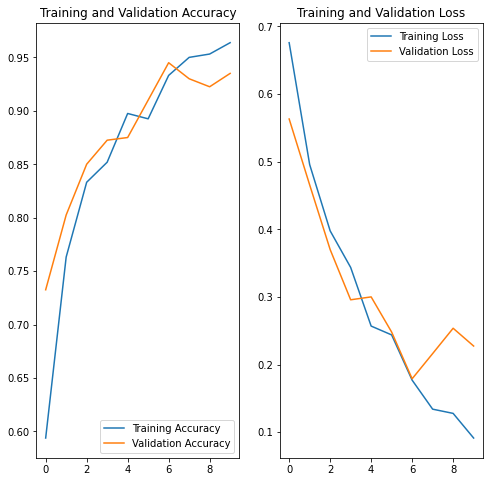

In [553]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Model evaluation

In [585]:
model=model.evaluate(train_ds)

50/50 [==============================] - 6s 121ms/step - loss: 0.2664 - accuracy: 0.8988


In [586]:
import shutil
shutil.make_archive("gender_model", 'zip', "gender_model")

'/content/gender_model.zip'

In [587]:
url = input('Enter URL: ')

Enter URL: http://1.bp.blogspot.com/-SoqXyFz5Qd8/TwSQcD_MiNI/AAAAAAAAB8U/lAAdn9jDLj0/s1600/Wallcate.com+-+Beautiful+women%2527s+faces+Wallpaper++%252882%2529.jpg


In [589]:
import urllib.request
urllib.request.urlretrieve(url,'female.jpg')

('female.jpg', <http.client.HTTPMessage at 0x7f7de659e128>)



This image is 19.45 percent male and 80.55 percent female.


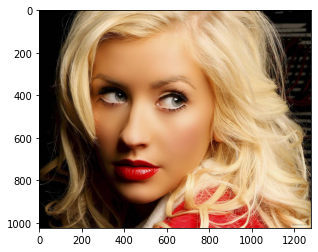

In [591]:
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('female.jpg'))

load_model = keras.models.load_model('gender_model')
img = keras.preprocessing.image.load_img(
    "female.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = load_model.predict(img_array)
score = predictions[0]
print(
    "\n\nThis image is %.2f percent male and %.2f percent female."
    % (100 * (1 - score), 100 * score)
)

# Section 5) Inference test of your model

My model recognizes people by gender. Given the data set that was used, the model is only good if age group of people are between 20-60 years old, meaning baby faces are not inculded in image dataset. 

To test inference, I downloaded a picture of my favourite singer, imported it to my system, and ran my ML model to see if she was being recognized as a male or a female. Given my own definition of success criteria, I should have 89% or greater chances of asserting that my favourite singer is a female.



# Section 6) Summary 
Given your own definition of success of this project. Were you successful?

Yes, I think I was successful to the object of research where the criteria for kid images have been out of zone. However, I think I could add more gender related pictures to increase the accuracy of my model.

If yes: thinking back, what was the hardest part? what would you have done different?

The hardest part was collecting the images because most of the images were face images and I had not sort them out by female and male.

If not: what went wrong? can this project be saved? what would you need to make it successful?

I think I did a great job considering that I was brave enough to go with image datasets I have never dealt with.